# <center> EXPLORATORY ANALYSIS OF THE EFFECT OF FHVs ON TAXIS AND TAXI MEDALLIONS
    

### I. Background
Taxi medallion, also known as CNPC (Certificate of Public Necessity and Convenience), is a license issued to taxi drivers, allowing them to pick up passengers, hailing them from the street. This licensing system is instituted to assure taxi quality as medallion owners have to follow the city’s rules, including maintaining a certain standard of safety and cleanliness. Taxi medallion also helps the city control the supply of taxis, preventing oversaturation of cabs, limiting congestion, and avoiding price gouging. However, just like every other form of quality control, taxi medallion creates a deadweight loss as there is a limited number of medallions issued. Given the limitation, there are more people willing to supply more taxi services and more people willing to pay for them.

This taxi licensing system is used in multiple cities including New York City (NYC), Boston, Cambridge, Chicago, Philadelphia, and San Francisco. In this project, we will be looking at the system in NYC. It started to be implemented in the 1930s with a total of 11,787 medallions. In 1995, the city still only issued 11,787 licenses although the demand for taxis has increased significantly. However, as demand rises, people are incentivized to circumvent the restrictions by mobile-app-based car services like Uber and Lyft. With these apps, drivers and passengers are connected online, and drivers are directed to the passengers’ locations. There is no need to hail passengers from the street. These ride-sharing apps make medallions ineffective to some extent. This year, the number of Uber drivers is approximately 16,000 while there are only 13,587 licensed taxi cabs according to the Taxi & Limousine Commission (TLC).

In this project, we will examine the effect of high-volume for-hire vehicles (FHVs), particularly Uber and Lyft, on the taxis and taxi medallions.

### II. Datasets

We will be using the TLC Trip Record Data published by TLC on this [webpage](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

To see the changing effects through time, we will look at the data of yellow cabs, Uber and Lyft trips from two years, 2015 when Uber and Lyft started growing tremendously in NYC and 2019 the most recent year without the effect of COVID-19.

We will just sample one month from these two years because of there are roughly more than 2 million trips recorded each month. Given the scope of the project, it is not plausible to go over all 24 months in these two years.

### III. Problem Restatement

Examine the effect of Uber and Lyft on the government's taxi medallion by answering these questions:

- What are the differences in the number of trips by FHVs and yellow cabs in 2015 and 2019? (exploratory and inferential analysis)
- What are some possible factors that make people choose FHVs over yellow cabs? (causal analysis)

### IV. Coding and Interpretation
#### 1. Initial Setup

In [5]:
import pandas as pd
import re
import numpy as np
import  matplotlib.pyplot as plt
from datetime import datetime
import math

#### 2. Read the data sets

Due to the large size of the datasets that takes up a long running time, we would create subsets of the datasets instead. The subsets would include data from March 1st 2015 to March 15th 2015 and data on March 1st 2019 only. 

In [102]:
def buildLol(file):
    '''
    Given a file object creates a list of lists LoL representation of the table. 
    
    Parameter: 
   fhv15DF2 a file object
    
    Return value:
    - lol: a list of lists representation of the table
    - columnsL: a list of column names
    '''
    lol = []
    columnsL = file.readline().strip().split(',')
    for line in file:
        curRow = line.strip().split(',')
        lol.append(curRow)
    return lol, columnsL

def buildDol(file):
    '''
    Read a csv file and create a dictionary of lists representation of the table
    
    Parameter:
    - file: a file object
    
    Return value: a dictionary of lists 
    '''
    file.seek(0)                                             # change the position of the file handle to the first position
    dol = {}
    
    columnsName = file.readline().strip().split(',')         # create a list of column names
    
    for i in columnsName:
        dol[i] = []                                          # for each column name, create a key associated with an empty list
    
    for line in file:                                        # iterate over each line
        curRow = line.strip().split(',')                     # strip the whitespace at the end of the line 
                                                             # and split the line into a list of different elements by ','
        for i in range(len(columnsName)):                    # iterate over each column name        
            dol[columnsName[i]].append(curRow[i])            # add the new element to the appropriate key in the dictionary
    
    return dol

def txtToDict(file):
    '''
    Read a text file and return a dictionary to map the keys and values in the text file
    
    Parameter:
    - file: file object
    
    Return value: a dictionary 
    '''
    txt = file.read()
    pattern = r'(B\d{5}) (\w+)'                      #regular expression to extract the necessary data from the text file
    D = {}
    for match in re.finditer(pattern, txt):
        D[match.group(1)] = match.group(2) 
    return D

# use Lol to read FHVs data in 2015
fhv15File = open('fhv_tripdata_2015-03.csv','r')
fhv15Lol, fhv15Cols = buildLol(fhv15File)
fhv15File.close()
fhv15DF = pd.DataFrame(fhv15Lol, columns = fhv15Cols)
print('FHV15DF')
print(fhv15DF.head())

# use Dol to read yellow cabs data in 2015
ycab15File = open('yellow_tripdata_2015-03.csv','r')
ycab15Dol = buildDol(ycab15File)
ycab15File.close()
ycab15DF = pd.DataFrame(ycab15Dol)
print('YCAB15DF')
print(ycab15DF.head())

# use read_csv to read FHVs and yellow cabs data in 2019
fhv19DF = pd.read_csv('fhvhv_tripdata_2019-03.csv')
ycab19DF = pd.read_csv('yellow_tripdata_2019-03.csv')

#read the licenseNumber.txt file 
licenseFile = open('licenseNumber.txt','r')
D = txtToDict(licenseFile)

FHV15DF
  Dispatching_base_num    Pickup_date locationID
0               B00248  3/1/2015 0:00           
1               B00256  3/1/2015 0:00           
2               B00256  3/1/2015 0:00           
3               B00256  3/1/2015 0:00           
4               B00256  3/1/2015 0:00           
YCAB15DF
  VendorID tpep_pickup_datetime tpep_dropoff_datetime passenger_count  \
0        1        3/1/2015 0:02         3/1/2015 0:17               1   
1        1        3/1/2015 0:02         3/1/2015 0:14               3   
2        1        3/1/2015 0:02         3/1/2015 0:15               1   
3        1        3/1/2015 0:02         3/1/2015 0:11               3   
4        1        3/1/2015 0:02         3/1/2015 0:10               2   

  trip_distance pickup_longitude pickup_latitude RateCodeID  \
0           1.4     -74.00046539     40.73397446          1   
1           1.9     -73.96755981     40.75631714          1   
2           2.9     -73.98907471     40.72138596          1  

#### 3. Filter the data sets

In [103]:
def apply_func(col, func, D):
    '''
    Apply function to all the rows in a column and return a list of results
    
    Parameters:
    - col: name of the column
    - func: name of the function
    - D: a dictionary which is one of the parameters of the function we need to apply to the column
    
    Return value: a list of results
    '''
    L = []
    for i in col:                                #iterate over each rows in the column
        L.append(func(i, D))
    return L

def matchLicense(license, D):
    '''
    Given the license number returns the company's name
    
    Parameters:
    - license: a license number
    - D: the dictionary of license numbers and companies
    
    Return value: the company's name
    '''
    if license in D:
        return D[license]                        
    else:
        return np.nan

# Match the license number with the company's name and create a new company column in the datasets
fhv15DF['company'] = apply_func(fhv15DF['Dispatching_base_num'], matchLicense, D)
fhv15DF = fhv15DF[(fhv15DF['company'] == 'Uber') | (fhv15DF['company'] == 'Lyft')]
print('FHV15DF')
print(fhv15DF)

fhv19DF['company'] = apply_func(fhv19DF['dispatching_base_num'], matchLicense, D)
fhv19DF = fhv19DF[(fhv19DF['company'] == 'Uber') | (fhv19DF['company'] == 'Lyft')]
print('FHV19DF')
print(fhv19DF.head())

FHV15DF
       Dispatching_base_num      Pickup_date locationID company
0                    B00248    3/1/2015 0:00               Uber
1                    B00256    3/1/2015 0:00               Uber
2                    B00256    3/1/2015 0:00               Uber
3                    B00256    3/1/2015 0:00               Uber
4                    B00256    3/1/2015 0:00               Uber
...                     ...              ...        ...     ...
515376               B01315  3/15/2015 23:59               Uber
515377               B01938  3/15/2015 23:59               Uber
515378               B01938  3/15/2015 23:59               Uber
515379               B02099  3/15/2015 23:59               Uber
515381               B01282  3/15/2015 23:59               Uber

[340031 rows x 4 columns]
FHV19DF
   hvfhs_license_num dispatching_base_num pickup_datetime dropoff_datetime  \
11            HV0005               B02510   3/1/2019 0:00    3/1/2019 0:25   
14            HV0005             

#### 4. Explore the data sets
##### a. Create a line graph comparing number of yellow cab and taxi trips in March 2015

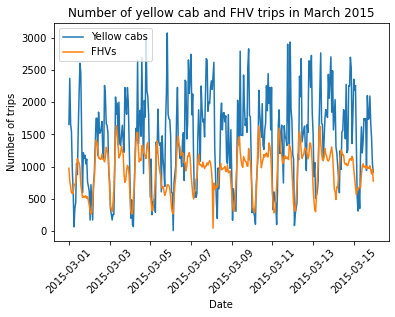

In [104]:
def roundTime(df1,df2):
    '''
    Round the time in the original dataset down to hour in the new data set
    
    Parameters:
    - df1: the original dataset
    - df2: the new dataset
    '''
    pattern = r'(\d{1,2}/\d{1,2}/\d{4} \d{1,2}:)\w*'
    for i in range(len(df1)):
        df2.iloc[i,0] = re.findall(pattern, df1.iloc[i,1])[0] + '00' #round the time down to hour, 12:34 -> 12:00

# Create a new dataframe with just time to minimize the runtime
ycab15DF2 = pd.DataFrame({'Date_time':[]})
ycab15DF2['Date_time'] = ycab15DF['tpep_pickup_datetime']
fhv15DF2 = pd.DataFrame({'Date_time':[]})
fhv15DF2['Date_time'] = fhv15DF['Pickup_date']

# Round the time down to hour, 12:34 -> 12:00, to draw a line graph with the number of trips per hour
roundTime(ycab15DF, ycab15DF2)
roundTime(fhv15DF, fhv15DF2)

# Change object type to datetime type
ycab15DF2['Date_time'] = pd.to_datetime(ycab15DF2['Date_time']) 
fhv15DF2['Date_time'] = pd.to_datetime(fhv15DF2['Date_time'])

# Count the number of trips in each hour
ycab15DF2 = ycab15DF2.groupby(['Date_time']).size().reset_index(name='counts')
fhv15DF2 = fhv15DF2.groupby(['Date_time']).size().reset_index(name='counts')

# Draw a line graph with time and number of trips
plt.plot(ycab15DF2['Date_time'], ycab15DF2['counts'], label = 'Yellow cabs')
plt.plot(fhv15DF2['Date_time'], fhv15DF2['counts'], label = 'FHVs')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Number of trips')
plt.title('Number of yellow cab and FHV trips in March 2015')
plt.legend()
plt.show()

The line graph compares the number of yellow cab and and FHV trips in March 2015. Overall, the number of taxi trips was greater than the number of FHV trips with the maximum number being approximately 3000 in an hour. The maximum number of FHV trips is harder to determine based on the line graph so we would need to calculate it later. This is not surprising since Uber and Lyft started growing tremendously in NYC in 2015 so at the beginning of 2015, it makes sense that there were still fewer number of Uber and Lyft trips than taxi trips. 

From the graph, we also notice that the number of trips fluctuated greatly regardless of the type of vehicles. However, the taxi trip volume fluctuates a lot more than the FHV trip volume. We would need to calculate some summary statistics to get an exact number of the differences between the range of the two volumes. Looking at the great fluctuations, there may be some factors that significanty increase the demand for taxis at some specific time.

##### b. Create a line graph comparing number of yellow cab and taxi trips in March 2019

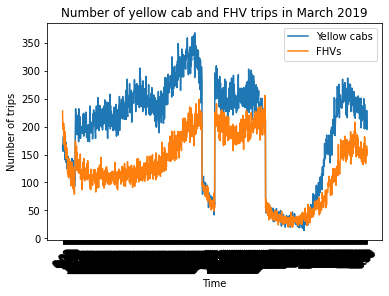

In [105]:

# Count the number of trips in each minute
ycab19DF2 = ycab19DF2.groupby(['Hour_min']).size().reset_index(name='counts')
fhv19DF2 = fhv19DF2.groupby(['Hour_min']).size().reset_index(name='counts')

# Draw a line graph with time and number of trips
plt.plot(ycab19DF2['Hour_min'], ycab19DF2['counts'], label = 'Yellow cabs')
plt.plot(fhv19DF2['Hour_min'], fhv19DF2['counts'], label = 'FHVs')
plt.xlabel('Time')
plt.ylabel('Number of trips')
plt.xticks(rotation=45)
plt.title('Number of yellow cab and FHV trips in March 2019')
plt.legend()
plt.locator_params(axis='x', nbins=10)
plt.show()

The line graph compares the number of yellow cab and FHV trips in March 2019. Overall, the number of taxi trips was greater than the number of FHV trips with the maximum number of trips being approximately 350 trips in a minute. Meanwhile, the maximum number of FHV trips is approximately 230 trips per minute. This is surprising because in 2019, there were more Uber and Lyft drivers than taxi cabs' in NYC according to the Taxi & Limousine Commission (TLC). 

From the graph, we also notice that the patterns of taxi and FHV trips are similar to each other. Therefore, time may not be a determining factor for number of trips. Also, the trough of taxi and FHV volume is roughly the same, at below 50. This means that the range of the taxi trips is greater than the range of FHVs.

##### c. Summary Statistics

In [108]:
print('Summary Statistics of the number of taxi trips in ycab15DF2: ')
print(ycab15DF2['counts'].describe())
print('Range:', ycab15DF2['counts'].max() - ycab15DF2['counts'].min())

Summary Statistics of the number of taxi trips in ycab15DF2: 
count     349.000000
mean     1455.733524
std       676.572936
min         8.000000
25%      1000.000000
50%      1495.000000
75%      1874.000000
max      3075.000000
Name: counts, dtype: float64
Range: 3067


In [109]:
print('Summary Statistics of the number of fhv trips in fhv15DF2: ')
print(fhv15DF2['counts'].describe())
print('Range:', fhv15DF2['counts'].max() - fhv15DF2['counts'].min())

Summary Statistics of the number of fhv trips in fhv15DF2: 
count     360.000000
mean      944.530556
std       323.410808
min        47.000000
25%       687.250000
50%      1013.500000
75%      1170.000000
max      1635.000000
Name: counts, dtype: float64
Range: 1588


These summary statistics match with what we observe from the graphs but provide us with more concrete evidence for our interpretation:
- The two data sets have 349 and 360 data points for taxi record data and fhv record data respectively. These two numbers are roughly equal to each other. Therefore, we can guarantee that any conclusions we draw from the comparison between these two data sets are fair and independent of its size. 
- The mean number of taxi trips is 1.5 times the mean number of fhv trips. Specifically, the mean number of taxi trips is 1456, while the mean number of fhv trips is 945. This matches our observation and indicates that there are a lot more taxi trips than fhv trips. Although this does make sense given the year 2015, since this just reflects half of a month, we would need to use the Central Limit Theorem to find out the true means.
- The standard deviation is not very high, 6 and 323 for taxi and fhv trips respectively.
- The min, max and quartiles indicate that the number of both types of trips fluctuate dramatically. 

In [110]:
print('Summary Statistics of the number of taxi trips in ycab19DF2: ')
print(ycab19DF2['counts'].describe())
print('Range:', ycab19DF2['counts'].max() - ycab19DF2['counts'].min())

Summary Statistics of the number of taxi trips in ycab19DF2: 
count    1440.000000
mean      195.224306
std        89.325005
min        14.000000
25%       126.750000
50%       225.000000
75%       255.250000
max       368.000000
Name: counts, dtype: float64
Range: 354


In [111]:
print('Summary Statistics of the number of fhv trips in fhv19DF2: ')
print(fhv19DF2['counts'].describe())
print('Range:', fhv19DF2['counts'].max() - fhv19DF2['counts'].min())

Summary Statistics of the number of fhv trips in fhv19DF2: 
count    1440.000000
mean      126.864583
std        57.376562
min        20.000000
25%        92.000000
50%       123.000000
75%       176.250000
max       256.000000
Name: counts, dtype: float64
Range: 236


These summary statistics match with what we observe from the graphs but provide us with more concrete evidence for our interpretation:
- The two data sets have the same number of data points, 1440. Therefore, we can guarantee that any conclusions we draw from the comparison between these two data sets are fair and independent of its size. 
- The mean number of taxi trips is 1.5 times the mean number of fhv trips. Specifically, the mean number of taxi trips is 195, while the mean number of fhv trips is 126. This matches our observation and indicates that there are a lot more taxi trips than fhv trips. This doesn't make sense given the growth of Uber and Lyft in recent years. However, since this just reflects one specific date, we would need to use the Central Limit Theorem to find out the ranges of the true means. If the ranges of both true means are large, this indicates that the means of the sample do not reflect the true means, and any conclusions or observations using the means of the sample may not be true given the large data sets of all the taxi and fhv trips.
- The standard deviation is not very high, 89 and 57 for taxi and fhv trips respectively.
- The min, max and quartiles indicate that the numbers of both types of trips are highly skewed. Most of the number of taxi trips are large with the 1st, 2nd, 3rd quartile and maximum number being 127, 225, 226 and 368 respectively, while the minimum number is only 14. Similarly, most of the number of fhv trips are large with the 1st, 2nd, 3rd quartile and maximum number being 91, 124, 177 and 250 respectively, while the minimum number is only 20.


##### d. Statistical Inference

In [112]:
def trueMean(x, sd, n, qt):
    ''' 
    Using the Central Limit Theorem, calculate the range of true mean
    
    Parameters:
    - x: the mean of the sample
    - sd: the standard deviation of the sample
    - n: the sample size
    - qt: the value of the inverse cumulative density function (cdf) of the t-distribution given the confidence interval
    
    Return value: 
    - lowerBound: the lower bound of the range
    - upperBound: the upper bound of the range
    '''
    upperBound = x + qt*sd/math.sqrt(n)
    lowerBound = x - qt*sd/math.sqrt(n)
    return lowerBound, upperBound

lowerBoundYcab15, upperBoundYcab15 = trueMean(1455.733524,676.572936,349,1.967)
print('The true mean number of the taxi trips in 2015 is between', round(lowerBoundYcab15,2), 'and', round(upperBoundYcab15,2))
lowerBoundFhv15, upperBoundFhv15 = trueMean(944.530556,323.410808,360,1.967)
print('The true mean number of the fhv trips in 2015 is between', round(lowerBoundFhv15,2), 'and', round(upperBoundFhv15,2))
lowerBoundYcab19, upperBoundYcab19 = trueMean(195.224306,89.325005,1440,1.967)
print('The true mean number of the taxi trips in 2019 is between', round(lowerBoundYcab19,2), 'and', round(upperBoundYcab19,2))
lowerBoundFhv19, upperBoundFhv19 = trueMean(126.864583,56.569725,1440,1.967)
print('The true mean number of the fhv trips in 2019 is between', round(lowerBoundFhv19,2), 'and', round(upperBoundFhv19,2))

The true mean number of the taxi trips in 2015 is between 1384.5 and 1526.97
The true mean number of the fhv trips in 2015 is between 911.0 and 978.06
The true mean number of the taxi trips in 2019 is between 190.59 and 199.85
The true mean number of the fhv trips in 2019 is between 123.93 and 129.8


The range of the true mean is calculated with 95% confidence interval.

After calculating the ranges of the true means of taxi and fhv trips, we can see that the ranges are not very large, except for the the true mean of the taxi trips in 2015. 

The differences between the upper and lower bound of the true means for fhv trips in 2015, taxi and fhv trips in 2019 are only 67, 10, and 6 trips respectively. Given the small ranges, the conclusion we draw from the means of the sample may be valid. Therefore, we need to investigate more on why the number of taxi trips in 2019 is higher than the number of fhv trips. Although the small ranges validate our conclusion and observation, we also need to take a larger sample or sample another month in 2019 because these two datasets in 2019 are highly skewed.

Meanwhile, the difference between the upper and lower bound of the true mean for taxi trips in 2015 is 142 trips. Therefore, we may need to take a larger sample or sample another month in 2015 to reach a valid conclusion. 

### V. Conclusions

After exploring the dataset by drawing line graphs, calculating the summary statistics and validating the sample means using the Central Limit Theorem, we conclude:
(1) In 2015, there are more taxi trips than fhv trips, and there may be some factors that significanty increase the demand for taxis at some specific time.
(2) In 2019, there are more taxi trips than fhv trips, and time in a day may not be a determining factor for number of trips

Some of the next steps to take: 
(1) Investigate more on why the number of taxi trips in 2019 is higher than the number of fhv trips. 
(2) Take a larger sample or sample another month in 2019 because these two datasets in 2019 are highly skewed.
(3) Take a larger sample or sample another month in 2015 to reach a valid conclusion.